<a href="https://colab.research.google.com/github/Megreid23/final_project/blob/rachel_dev_final/anime_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import our dependencies (RTR)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

In [ ]:
# import clean anime csv (RTR)
url = 'https://raw.githubusercontent.com/Megreid23/final_project/main/clean_anime.csv'
clean_anime_df = pd.read_csv(url)
clean_anime_df.head()

,anime_id,type,score,scored_by,episodes,start_date,source,rating,sfw,start_season,demographics,studios,producers,licensors,keywords
0,5114,tv,9.13,1871705,64.0,2009-04-05,manga,r,True,spring,['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Action', 'Adventure', 'Drama', 'Fantasy', 'M..."
1,11061,tv,9.04,1509622,148.0,2011-10-02,manga,pg_13,True,fall,['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],"['Action', 'Adventure', 'Fantasy']"
2,38524,tv,9.07,1329500,10.0,2019-04-29,manga,r,True,spring,['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],"['Action', 'Drama', 'Gore', 'Military', 'Survi..."
3,9253,tv,9.08,1252286,24.0,2011-04-06,visual_novel,pg_13,True,spring,[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '...",['Funimation'],"['Drama', 'Sci-Fi', 'Suspense', 'Psychological..."
4,28851,movie,8.95,1398608,1.0,2016-09-17,manga,pg_13,True,summer,['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","['Drama', 'Romantic Subtext']"


In [ ]:
# value counts for source (RTR)
clean_anime_df['source'].value_counts()

manga           3763
original        2892
visual_novel    1059
light_novel      804
game             756
novel            468
other            356
4_koma_manga     263
web_manga        245
Name: source, dtype: int64

In [ ]:
# source value counts for binning (RTR)
source_counts = clean_anime_df['source'].value_counts()
source_counts

manga           3763
original        2892
visual_novel    1059
light_novel      804
game             756
novel            468
other            356
4_koma_manga     263
web_manga        245
Name: source, dtype: int64

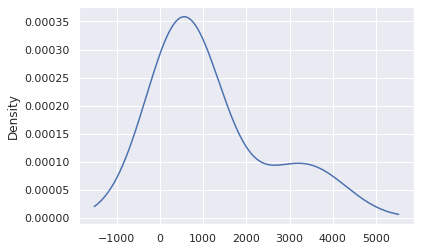

In [ ]:
# visualize source counts (RTR)
source_counts.plot.density()

<BarContainer object of 9 artists>

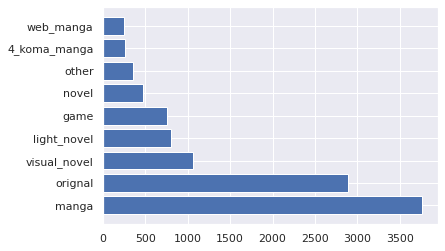

In [ ]:
x_axis = ["manga", "orignal", "visual_novel", "light_novel", "game", "novel", "other", "4_koma_manga", "web_manga"]
y_axis = [3763, 2892, 1059, 804, 756, 468, 356, 263, 245]
# Create the plot (JT)
plt.barh(x_axis, y_axis)

In [ ]:
# combine manga, visual_novel, light_novel, game, novel, other, 4_koma_manga, and web_manga into source

x = {'x': 'Original'}   
clean_anime_df = clean_anime_df.replace(x)

x = dict.fromkeys(['manga', 'visual_novel', 'light_novel', 'game', 'novel', 'other', '4_koma_manga', "web_manga"], 'Non-Original')    
clean_anime_df = clean_anime_df.replace(x)

clean_anime_df.reset_index(inplace=True, drop=True)

clean_anime_df.head()
#LZ

,anime_id,type,score,scored_by,episodes,start_date,source,rating,sfw,start_season,demographics,studios,producers,licensors,keywords
0,5114,tv,9.13,1871705,64.0,2009-04-05,Non-Original,r,True,spring,['Shounen'],['Bones'],"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","['Funimation', 'Aniplex of America']","['Action', 'Adventure', 'Drama', 'Fantasy', 'M..."
1,11061,tv,9.04,1509622,148.0,2011-10-02,Non-Original,pg_13,True,fall,['Shounen'],['Madhouse'],"['VAP', 'Nippon Television Network', 'Shueisha']",['VIZ Media'],"['Action', 'Adventure', 'Fantasy']"
2,38524,tv,9.07,1329500,10.0,2019-04-29,Non-Original,r,True,spring,['Shounen'],['Wit Studio'],"['Production I.G', 'Dentsu', 'Mainichi Broadca...",['Funimation'],"['Action', 'Drama', 'Gore', 'Military', 'Survi..."
3,9253,tv,9.08,1252286,24.0,2011-04-06,Non-Original,pg_13,True,spring,[],['White Fox'],"['Frontier Works', 'Media Factory', 'Movic', '...",['Funimation'],"['Drama', 'Sci-Fi', 'Suspense', 'Psychological..."
4,28851,movie,8.95,1398608,1.0,2016-09-17,Non-Original,pg_13,True,summer,['Shounen'],['Kyoto Animation'],"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...","['Eleven Arts', 'NYAV Post']","['Drama', 'Romantic Subtext']"


In [ ]:
# (LZ)
source_counts_2 = clean_anime_df['source'].value_counts() 
source_counts_2

Non-Original    7714
original        2892
Name: source, dtype: int64

## create clean dataframes of list-like object columns for RTR to play with

In [ ]:
demographics_df = clean_anime_df[['anime_id', 'demographics']]
demographics_df.to_csv('demographics.csv')
demographics_df.head()

,anime_id,demographics
0,5114,['Shounen']
1,11061,['Shounen']
2,38524,['Shounen']
3,9253,[]
4,28851,['Shounen']


In [ ]:
# RTR make this work somehow
# ''.join(new_df['producers'][0]).replace("[","").replace("]", "")
# demographics_df.join(new_df['producers'][0]).replace("[","").replace("]", "")

In [ ]:
studios_df = clean_anime_df[['anime_id', 'studios']]
studios_df.to_csv('studios.csv')
studios_df.head()

,anime_id,studios
0,5114,['Bones']
1,11061,['Madhouse']
2,38524,['Wit Studio']
3,9253,['White Fox']
4,28851,['Kyoto Animation']


In [ ]:
producers_df = clean_anime_df[['anime_id', 'producers']]
producers_df.to_csv('producers.csv')
producers_df.head()

,anime_id,producers
0,5114,"['Aniplex', 'Square Enix', 'Mainichi Broadcast..."
1,11061,"['VAP', 'Nippon Television Network', 'Shueisha']"
2,38524,"['Production I.G', 'Dentsu', 'Mainichi Broadca..."
3,9253,"['Frontier Works', 'Media Factory', 'Movic', '..."
4,28851,"['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A..."


In [ ]:
licensors_df = clean_anime_df[['anime_id', 'licensors']]
licensors_df.to_csv('licensors.csv')
licensors_df.head()

,anime_id,licensors
0,5114,"['Funimation', 'Aniplex of America']"
1,11061,['VIZ Media']
2,38524,['Funimation']
3,9253,['Funimation']
4,28851,"['Eleven Arts', 'NYAV Post']"


In [ ]:
keywords_df = clean_anime_df[['anime_id', 'keywords']]
keywords_df.to_csv('keywords.csv')
keywords_df.head()

,anime_id,keywords
0,5114,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M..."
1,11061,"['Action', 'Adventure', 'Fantasy']"
2,38524,"['Action', 'Drama', 'Gore', 'Military', 'Survi..."
3,9253,"['Drama', 'Sci-Fi', 'Suspense', 'Psychological..."
4,28851,"['Drama', 'Romantic Subtext']"


In [ ]:
clean2_anime_df = clean_anime_df.drop(columns = ['demographics', 'studios', 'producers', 'licensors', 'keywords'])
clean2_anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10606 entries, 0 to 10605
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      10606 non-null  int64  
 1   type          10606 non-null  object 
 2   score         10606 non-null  float64
 3   scored_by     10606 non-null  int64  
 4   episodes      10606 non-null  float64
 5   start_date    10606 non-null  object 
 6   source        10606 non-null  object 
 7   rating        10606 non-null  object 
 8   sfw           10606 non-null  bool   
 9   start_season  10606 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 756.2+ KB


In [ ]:
clean2_anime_df.drop(columns = 'start_date', inplace=True)
clean2_anime_df.head()

,anime_id,type,score,scored_by,episodes,source,rating,sfw,start_season
0,5114,tv,9.13,1871705,64.0,Non-Original,r,True,spring
1,11061,tv,9.04,1509622,148.0,Non-Original,pg_13,True,fall
2,38524,tv,9.07,1329500,10.0,Non-Original,r,True,spring
3,9253,tv,9.08,1252286,24.0,Non-Original,pg_13,True,spring
4,28851,movie,8.95,1398608,1.0,Non-Original,pg_13,True,summer


In [ ]:
clean2_anime_df['score'] = clean2_anime_df['score'].astype(int)
clean2_anime_df.head()

,anime_id,type,score,scored_by,episodes,source,rating,sfw,start_season
0,5114,tv,9,1871705,64.0,Non-Original,r,True,spring
1,11061,tv,9,1509622,148.0,Non-Original,pg_13,True,fall
2,38524,tv,9,1329500,10.0,Non-Original,r,True,spring
3,9253,tv,9,1252286,24.0,Non-Original,pg_13,True,spring
4,28851,movie,8,1398608,1.0,Non-Original,pg_13,True,summer


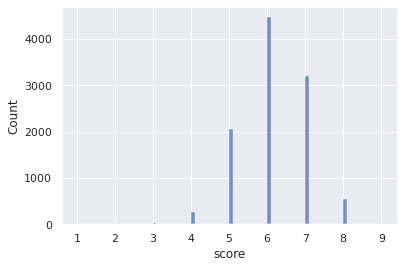

In [ ]:
plt.figure
sns.histplot(clean2_anime_df, x='score')

In [ ]:
# (LZ)
# Create our feature(s)
X = clean2_anime_df
X.value_counts()

anime_id  type     score  scored_by  episodes  source        rating  sfw    start_season
1         tv       8      844830     26.0      original      r       True   spring          1
32189     tv       7      172165     12.0      Non-Original  r       True   summer          1
32191     ona      5      3514       1.0       Non-Original  pg      True   fall            1
32195     special  6      420        2.0       Non-Original  rx      False  summer          1
32202     ova      6      1002       1.0       original      pg_13   True   spring          1
                                                                                           ..
6075      tv       5      283        12.0      Non-Original  pg_13   True   summer          1
6076      movie    5      1057       1.0       Non-Original  r       True   summer          1
6078      ova      5      343        1.0       Non-Original  r+      True   winter          1
6087      tv       6      345        27.0      original      g   

In [ ]:
# (LZ)
#Create our target
y = clean_anime_df["score"]
y.value_counts()

6.51    72
6.55    60
6.47    59
6.66    59
6.32    58
        ..
2.28     1
4.31     1
3.30     1
4.41     1
4.46     1
Name: score, Length: 518, dtype: int64

In [ ]:
#Get Dummies
X_encoded = pd.get_dummies(X)
X_encoded.head()

,anime_id,score,scored_by,episodes,sfw,type_movie,type_ona,type_ova,type_special,type_tv,...,rating_g,rating_pg,rating_pg_13,rating_r,rating_r+,rating_rx,start_season_fall,start_season_spring,start_season_summer,start_season_winter
0,5114,9,1871705,64.0,True,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,11061,9,1509622,148.0,True,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,38524,9,1329500,10.0,True,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,9253,9,1252286,24.0,True,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,28851,8,1398608,1.0,True,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#Scale the data
scaler = StandardScaler()
X_encoded_scaled = scaler.fit_transform(X_encoded)
X_encoded_scaled[:5]

array([[ 0.61229305, -0.61229305],
       [ 0.61229305, -0.61229305],
       [ 0.61229305, -0.61229305],
       [ 0.61229305, -0.61229305],
       [ 0.61229305, -0.61229305]])

In [ ]:
#train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, random_state = 1)

In [ ]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

ValueError: ignored